# PROJECT 3 (PART 2)
### CLASSIFYING JAPAN TRAVEL POST FROM JAPAN LIFE IN  REDDIT.COM
### -VECTORISING, EDA,  MODELLING, EVALUATION  

In [1]:
# importing the libraries
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction import stop_words
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud, STOPWORDS
from matplotlib_venn_wordcloud import venn2_wordcloud

%matplotlib inline

In [2]:
# reading the file that is pickled at project 3 preprocessing as a pandas dataframe
japan_clean_df = pd.read_pickle("../datasets/japan_cleaned_data.pkl")
japan_clean_df.head(5)

,content,subreddit,clean_round1,clean_lemma,clean_stem,clean_lemma_stem
0,Me and my travel-buddy really want to catch a ...,0,"[travel-buddy, really, want, catch, mma-fight,...","[travel-buddy, really, want, catch, mma-fight,...","[travel-buddi, realli, want, catch, mma-fight,...","[travel-buddi, realli, want, catch, mma-fight,..."
1,Ishigaki/Okinawa Just wondering where the best...,0,"[ishigaki, okinawa, wondering, best, places, s...","[ishigaki, okinawa, wondering, best, place, sn...","[ishigaki, okinawa, wonder, best, place, snork...","[ishigaki, okinawa, wonder, best, place, snork..."
2,PSA: Tobu-Nikko service resumption Anyone else...,0,"[psa, tobu-nikko, service, resumption, anyone,...","[psa, tobu-nikko, service, resumption, anyone,...","[psa, tobu-nikko, servic, resumpt, anyon, els,...","[psa, tobu-nikko, servic, resumpt, anyon, els,..."
3,Did I Book the Osaka Cup Ramen Museum Correctl...,0,"[book, osaka, cup, ramen, museum, correctly, m...","[book, osaka, cup, ramen, museum, correctly, m...","[book, osaka, cup, ramen, museum, correctli, m...","[book, osaka, cup, ramen, museum, correctli, m..."
4,Tokyo motorcycle route Thinking of renting a m...,0,"[tokyo, motorcycle, route, thinking, renting, ...","[tokyo, motorcycle, route, thinking, renting, ...","[tokyo, motorcycl, rout, think, rent, motor, c...","[tokyo, motorcycl, rout, think, rent, motor, c..."


In [3]:
# counting the unique words got after 1st round cleaning, lemmatizing, stemming, lemmatize stemming
l1=[]
l2=[]
l3=[]
l4=[]
for i in japan_clean_df.index:
    l1.extend(japan_clean_df['clean_round1'][i])
    l2.extend(japan_clean_df['clean_lemma'][i])
    l3.extend(japan_clean_df['clean_stem'][i])
    l4.extend(japan_clean_df['clean_lemma_stem'][i])
print('unique wordcount')    
print('cleanround1',len(set(l1)),'clean_lemma',len(set(l2)),'clean_stem',len(set(l3)),'clean_lemma_stem',len(set(l4)),)   


unique wordcount
cleanround1 16404 clean_lemma 14881 clean_stem 12381 clean_lemma_stem 12358


### I have chosen column cleaned by both lemma and stem to be the corpus because the number of words are lesser compared to all other methods. Eventhough, some of the spelling are wrong they don't affect the classification. 

In [4]:
# Choosing column clean_lemma_stem which contains the corpus and column subreddit which 
# have the target for furthe analysis.
japan_clean_df=japan_clean_df.loc[:,['clean_lemma_stem','subreddit']]
japan_clean_df.head()

,clean_lemma_stem,subreddit
0,"[travel-buddi, realli, want, catch, mma-fight,...",0
1,"[ishigaki, okinawa, wonder, best, place, snork...",0
2,"[psa, tobu-nikko, servic, resumpt, anyon, els,...",0
3,"[book, osaka, cup, ramen, museum, correctli, m...",0
4,"[tokyo, motorcycl, rout, think, rent, motor, c...",0


In [5]:
# converting the bag of word list into a string, so that we can feed them to count vectoriser
japan_clean_df['clean_lemma_stem']=japan_clean_df['clean_lemma_stem'].apply(lambda x:' '.join(x))
japan_clean_df.head()

,clean_lemma_stem,subreddit
0,travel-buddi realli want catch mma-fight japan...,0
1,ishigaki okinawa wonder best place snorkel ish...,0
2,psa tobu-nikko servic resumpt anyon els look g...,0
3,book osaka cup ramen museum correctli made res...,0
4,tokyo motorcycl rout think rent motor cycl sco...,0


In [6]:
# getting the index of the dataframe to supply the index when we have to reconstuct data frame after
# count vectorisation.So that our features and target will have same index. 
indices = []
for row in japan_clean_df.index: 
    indices.append(row)
  

In [7]:
# Lets use the stop_words argument to remove words like "and, the, a"
cvec = CountVectorizer(stop_words='english',max_features=900)

# Fit our vectorizer using our train data
cvec.fit(japan_clean_df['clean_lemma_stem'])

# and check out the length of the vectorized data after
len(cvec.get_feature_names())

900

##### Manually changing the max_features in the CountVectorizer() gives a different result. The accuracy is better around 1% for 900 max features compared to 800 or 1000 max features.

In [8]:
# Transforming our x data using our fit cvec.
# And converting the result to a DataFrame.
X_cvec = pd.DataFrame(cvec.transform(japan_clean_df['clean_lemma_stem']).todense(),
                       columns=cvec.get_feature_names(),index = indices)
X_cvec.head()


,abl,absolut,accept,access,accommod,account,activ,actual,ad,add,...,wrong,www,yakushima,yasaka,ye,year,yen,yokocho,yokohama,yoyogi
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,4,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Our Document term matrix is ready

In [9]:
# splitting the data into training and test set.
X_train, X_test, y_train, y_test = train_test_split(X_cvec, japan_clean_df['subreddit'], test_size=0.2,shuffle=True,random_state=48)

In [10]:
# top 30 words used in both subreditt
word_counts = X_train.sum(axis=0)
print(len(word_counts))
word_counts.sort_values(ascending = False).head(30)

900


day          2803
tokyo        2057
japan        1249
time         1152
kyoto        1078
osaka        1035
trip         1000
like          960
want          702
amp           693
know          669
plan          660
look          650
th            643
check         642
travel        615
thank         612
train         608
night         572
hotel         563
place         562
visit         555
stay          545
area          540
tri           538
anyon         529
http          520
pm            503
use           492
itinerari     490
dtype: int64

In [11]:
# defining the name of the subreddit to be used while specifying the top words
target_name=['japan_travel','japan_life']

In [12]:
# top 10 words used in individual subreddit is to be found
common_words_japantravel = []
common_words_japanlife = []
for i in range(2):
    word_count = X_train[y_train==i].sum(axis=0)
    print (target_name[i], "most common words")
    if i == 0:
        cw_japantravel = word_count.sort_values(ascending = False).head(50)
        common_words_japantravel.extend(cw_japantravel.index)
        print(cw_japantravel[0:50])
    else:
        cw_japanlife = word_count.sort_values(ascending = False).head(50)
        common_words_japanlife.extend(cw_japanlife.index)   
        print(cw_japanlife[0:50])

japan_travel most common words
day          2622
tokyo        1813
kyoto        1060
osaka        1010
trip          973
time          853
japan         795
travel        581
like          581
th            574
check         571
amp           571
plan          566
hotel         558
train         551
night         550
visit         518
pm            492
itinerari     488
stay          485
want          474
area          470
station       445
park          444
place         440
look          432
explor        409
templ         404
thank         393
museum        368
shop          359
tri           355
walk          354
hakon         352
shrine        349
morn          347
octob         345
know          344
http          337
pa            337
shinjuku      328
food          323
oct           317
recommend     317
thing         303
nov           300
arriv         299
realli        296
nara          283
jr            275
dtype: int64
japan_life most common words
japan       454
like       

### From the frequencies of words we could see people tend to share more about japan ### travel compared to japan life. The data from the subreddits are quiet imbalanced.
### -Top Words used in japan travel posts:
##### day, tokyo, kyoto, osaka, trip, time, japan, travel, like and thing
### -Top Words used in japan life posts:
##### japan, like, work, know, year, japanese, time, anyone, use and tokyo
Some of the words are listed in both the subreddit

In [13]:
# dataframe built for the top words in individual subreddit
japan_topwords = pd.DataFrame(common_words_japantravel,columns=['common_words_japantravel'])
japan_topwords['common_words_japanlife']=common_words_japanlife



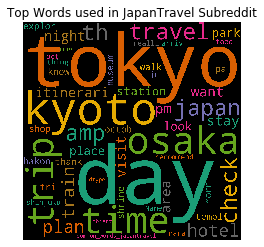

In [14]:
# word cloud is generated for top words used in japan travel subreddit 

wordcloud1 = WordCloud(width = 4000, height = 4000,  colormap = "Dark2" 
                ).generate(str(japan_topwords['common_words_japantravel']))

plt.title("Top Words used in JapanTravel Subreddit")
plt.imshow(wordcloud1)
plt.axis("off")
plt.savefig('../image/JapanTravelTopWords')


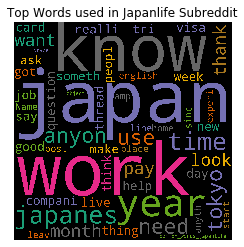

In [15]:
# word cloud is generated for top words used in japan life subreddit 
wordcloud2 = WordCloud(width = 4000, height = 4000,  colormap = "Dark2" 
                ).generate(str(japan_topwords['common_words_japanlife']))
plt.imshow(wordcloud2)
plt.title("Top Words used in Japanlife Subreddit")
plt.axis("off")
plt.savefig('../image/JapanLifeTopWords')
plt.show()

In [16]:
# the 50 topwords and its frequencies for japan travel and life are combined 
# together to be used in the venn2_wordcloud for getting relevant size for the words in the plot
words = common_words_japantravel + common_words_japanlife

frequency=[2622, 1813, 1060, 1010,  973,  853,  795,  581,  581,  574,  571,
        571,  566,  558,  551,  550,  518,  492,  488,  485,  474,  470,
        445,  444,  440,  432,  409,  404,  393,  368,  359,  355,  354,
        352,  349,  347,  345,  344,  337,  337,  328,  323,  317,  317,
        303,  300,  299,  296,  283,  275,454, 379, 326, 325, 312, 309, 299, 295, 266, 244, 241, 237, 228,
       219, 218, 210, 197, 187, 183, 183, 181, 181, 180, 180, 173, 169,
       163, 158, 158, 155, 154, 153, 150, 148, 148, 147, 145, 138, 136,
       136, 134, 133, 132, 131, 128, 122, 122, 120, 120, 116]


<Figure size 1440x1008 with 0 Axes>

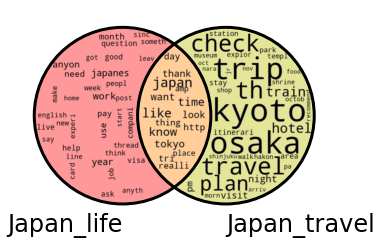

In [17]:
# Venn2 word cloud is plotted to visualize the common words
plt.figure(figsize = (20,14))
venn=venn2_wordcloud([set(common_words_japanlife), set(common_words_japantravel)], set_labels = ('Japan_life', 'Japan_travel'),set_colors= ['r', 'y'],word_to_frequency = dict(zip(words, frequency)))
print(venn)
plt.savefig('../image/venndiagram')


From the venn diagram, we can interpret that the Japan travel related posts are longer with more words compared to posts related to japan life as the number of the posts under the individual subreddit is around the same.

### MODEL 1 - LOGISTICS REGRESSION WITH DOCUMENT TERM MATRIX FROM COUNT VECTORISER

In [18]:
# fitting using logistic regression
lr = LogisticRegression()
lr.fit(X_train,y_train)
lr.score(X_train,y_train)

C:\Users\abinl\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9956112852664577

### The training score is very high and it is 0.995.

In [19]:
# Predicting with logistics regression
pred = lr.predict(X_test)

In [20]:
# obtaining confusion matrix
cm = confusion_matrix(y_test, pred)

In [21]:
# creating confusion matrix dataframe
cm_df = pd.DataFrame(cm, columns=['pred_japan_travel', 'pred_japan_life'], index=['actual_japan_travel', 'actual_japan_life'])
cm_df

,pred_japan_travel,pred_japan_life
actual_japan_travel,171,20
actual_japan_life,17,191


##### Based on the confusion matrix for our model1(Logistics regression), 
##### 171 Japan travel posts are predicted accurately
##### 191 Japan life posts are predicted accurately
##### 20 Japan travel posts are predicted as Japan life posts 
##### 17 Japan life posts are predicted as Japan travel posts 

In [22]:
# ravel the 2-d confusion matrix into 1-d confusion matrix for accessing each of the elements
tn, fp, fn, tp = cm.ravel()

In [23]:
# calculating accuracy for test data
Accuracy = (tp+tn)/(tn+fp+fn+tp)
print(Accuracy)

0.9072681704260651


The test accuracy is about 9% lower than the training data accuracy. We could see the model overfit for the training data but still the accuracy for testing data is not so bad.

In [24]:
# printing the classification report.
print(classification_report(y_test, pred, target_names=['japan_travel','japan_life']))

              precision    recall  f1-score   support

japan_travel       0.91      0.90      0.90       191
  japan_life       0.91      0.92      0.91       208

    accuracy                           0.91       399
   macro avg       0.91      0.91      0.91       399
weighted avg       0.91      0.91      0.91       399



##### The classification report shows the precision, recall or sensitivity, f1 score (Average of precision and recall) and the supporting number from confusion matrix.
##### The precision, recall and f1 score are about the same. They are all about 90%. 
##### out of 399 post in test data 191 posts are from Japan travel subreddit.
##### out of 399 post in test data 208 posts are from Japan travel subreddit.

In [25]:
# Let's create a dataframe called pred_df_log_reg that contains:
# 1. The list of true values of our test set.
# 2. The list of predicted probabilities for both the subreddit based on our model.

pred_proba_logreg_japanlife = [i[1] for i in lr.predict_proba(X_test)]
pred_proba_logreg_japantravel = [i[0] for i in lr.predict_proba((X_test))]

pred_df_log_reg = pd.DataFrame({'true_values': y_test,
                        'pred_probs_japanlife':pred_proba_logreg_japanlife,
                         'pred_probs_japantravel':pred_proba_logreg_japantravel})
pred_df_log_reg.head()




,true_values,pred_probs_japanlife,pred_probs_japantravel
1441,1,0.984295,0.015705
1419,1,0.997907,0.002093
718,0,0.091797,0.908203
33,0,0.000053,0.999947
492,0,0.017381,0.982619


### Model 2 multinomial naive bayes 

In [26]:
# initialising the multinomial naive bayes model
nb = MultinomialNB()


In [27]:
# splitting the data into test and train data
X_tr, X_tst, y_tr, y_tst = train_test_split(japan_clean_df['clean_lemma_stem'], japan_clean_df['subreddit'], test_size=0.2,shuffle=True,random_state=48)

In [28]:
# initialising the TfidfVectorizer
tfid=TfidfVectorizer(stop_words='english',
                                      sublinear_tf=True,
                                      max_df=0.5,
                                      max_features=900)
# creating pipeline for tfid and multinomialNB. 
# When we use pipeline, we can vectorize and train model(or any other steps) in single step.
model = make_pipeline(tfid,nb)
#training the model using .fit()
model.fit(X_tr, y_tr)
#predictind using test data
y_pred = model.predict(X_tst)
# Checking the score for train data
print (model.score(X_tr, y_tr))
# checking accuracy for test data
print (accuracy_score(y_tst, y_pred))
# checking the number of features used.
print ("Number of features:", len(model.steps[0][1].get_feature_names()))

0.903448275862069
0.9172932330827067
Number of features: 900


### The accuracy for the test data is 0.9173 which is even higher than the accuracy for the train data which is 0.9034. So naive bayes model does not overfit to training data. They also work pretty well for the test data.

In [29]:
# creating confusion matrix for multinomial naive bayes model
cm1 = confusion_matrix(y_tst, y_pred)

In [30]:
# creating a dataframe for confusion matrix
cm1_df = pd.DataFrame(cm1, columns=['pred_japan_travel', 'pred_japan_life'], index=['actual_japan_travel', 'actual_japan_life'])
cm1_df

,pred_japan_travel,pred_japan_life
actual_japan_travel,171,20
actual_japan_life,13,195


##### Based on the confusion matrix for our model2(Model 2 multinomial naive bayes), 
##### 171 Japan travel posts are predicted accurately
##### 195 Japan life posts are predicted accurately
##### 20 Japan travel posts are predicted as Japan life posts 
##### 13 Japan life posts are predicted as Japan travel posts 

In [31]:
# printing the classification report
print(classification_report(y_tst, y_pred, target_names=['japan_travel','japan_life']))

              precision    recall  f1-score   support

japan_travel       0.93      0.90      0.91       191
  japan_life       0.91      0.94      0.92       208

    accuracy                           0.92       399
   macro avg       0.92      0.92      0.92       399
weighted avg       0.92      0.92      0.92       399



##### The classification report shows the precision, recall or sensitivity, f1 score (Average of precision and recall) and the supporting number from confusion matrix.
##### The precision is higher for japan_travel compared to japan_life.
##### The sensitivity/recall is higher for japan_life compared to japan_travel.
##### out of 399 post in test data 191 posts are from Japan travel subreddit.
##### out of 399 post in test data 208 posts are from Japan travel subreddit.

In [32]:
# #prob for positive class
japantravel_class_prob_sorted = nb.feature_log_prob_[0, :].argsort()
# #prob for negative class
japanlife_class_prob_sorted = nb.feature_log_prob_[1, :].argsort()
# #getting the top features 
japantravel_top_features = np.take(tfid.get_feature_names(), japantravel_class_prob_sorted)
japanlife_top_features = np.take(tfid.get_feature_names(), japanlife_class_prob_sorted)
list1=[]
for i in reversed(japantravel_top_features[-50:-1]):
    list1.append(i)
list2=[]    
for j in reversed(japanlife_top_features[-50:-1]):
    list2.append(j)
print("Top Words used in Japantravel Subreddit-NB model:",list1)
print(list1)
print("Top Words used in Japanlife Subreddit-NB model:",list2)
print(list2)

Top Words used in Japantravel Subreddit-NB model: ['day', 'kyoto', 'trip', 'osaka', 'japan', 'travel', 'time', 'plan', 'thank', 'visit', 'stay', 'want', 'night', 'place', 'like', 'hotel', 'look', 'itinerari', 'train', 'know', 'area', 'check', 'anyon', 'tri', 'th', 'recommend', 'hakon', 'ticket', 'hi', 'park', 'pa', 'week', 'pm', 'museum', 'help', 'suggest', 'station', 'amp', 'templ', 'shinjuku', 'book', 'think', 'citi', 'arriv', 'shrine', 'novemb', 'spend', 'explor', 'shop']
['day', 'kyoto', 'trip', 'osaka', 'japan', 'travel', 'time', 'plan', 'thank', 'visit', 'stay', 'want', 'night', 'place', 'like', 'hotel', 'look', 'itinerari', 'train', 'know', 'area', 'check', 'anyon', 'tri', 'th', 'recommend', 'hakon', 'ticket', 'hi', 'park', 'pa', 'week', 'pm', 'museum', 'help', 'suggest', 'station', 'amp', 'templ', 'shinjuku', 'book', 'think', 'citi', 'arriv', 'shrine', 'novemb', 'spend', 'explor', 'shop']
Top Words used in Japanlife Subreddit-NB model: ['japan', 'know', 'work', 'like', 'japanes

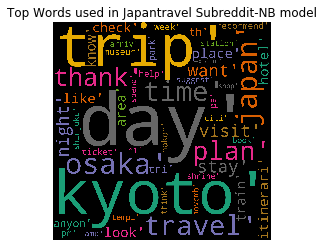

In [33]:
# word cloud is generated for top words used in japan travel subreddit NB model
wordcloud3 = WordCloud(width = 4000, height = 4000,  colormap = "Dark2" 
                ).generate(str(list1))
plt.imshow(wordcloud3)
plt.title("Top Words used in Japantravel Subreddit-NB model")
plt.axis("off")
plt.savefig('../image/NBJapanTravelTopWords')
plt.show()

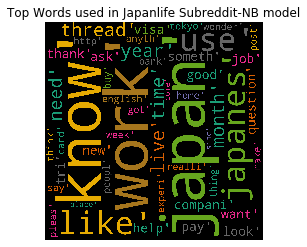

In [34]:
# word cloud is generated for top words used in japan life subreddit 
wordcloud4 = WordCloud(width = 4000, height = 4000,  colormap = "Dark2" 
                ).generate(str(list2))
plt.imshow(wordcloud4)
plt.title("Top Words used in Japanlife Subreddit-NB model")
plt.axis("off")
plt.savefig('../image/NBJapanlifeTopWords')
plt.show()

##### The topwords used in NB model and Logistic regression are quite similar.

### MODEL EVALUATION

In [35]:
# Let's create a dataframe called pred_df that contains:
# 1. The list of true values of our test set.
# 2. The list of predicted probabilities based on our model.

pred_proba_mnb_japanlife = [i[1] for i in model.predict_proba((X_tst))]
pred_proba_mnb_japantravel = [i[0] for i in model.predict_proba((X_tst))]

pred_df_mnb = pd.DataFrame({'true_values': y_tst,
                        'pred_probs_japanlife':pred_proba_mnb_japanlife,
                         'pred_probs_japantravel':pred_proba_mnb_japantravel  })
pred_df_mnb.head()

,true_values,pred_probs_japanlife,pred_probs_japantravel
1441,1,0.797971,0.202029
1419,1,0.977606,0.022394
718,0,0.430046,0.569954
33,0,0.042185,0.957815
492,0,0.124750,0.875250


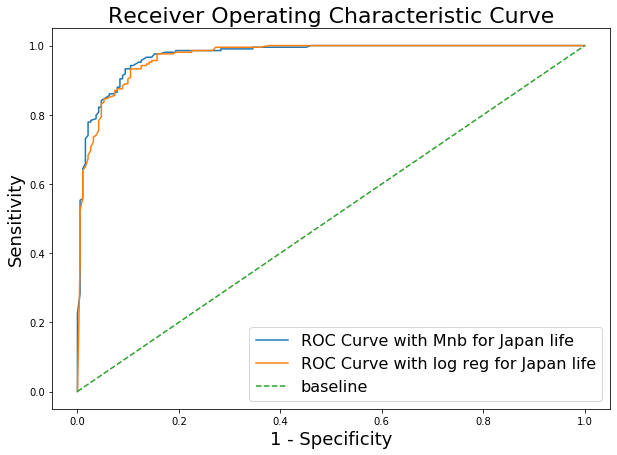

In [36]:
# Create figure.
plt.figure(figsize = (10,7))

# Create threshold values. (Dashed red line in image.)
thresholds = np.linspace(0, 1, 200)

# Define function to calculate sensitivity. (True positive rate.)
def TPR(df, true_col, pred_prob_col, threshold):
    true_positive = df[(df[true_col] == 1) & (df[pred_prob_col] >= threshold)].shape[0]
    false_negative = df[(df[true_col] == 1) & (df[pred_prob_col] < threshold)].shape[0]
    return true_positive / (true_positive + false_negative)
    

# Define function to calculate 1 - specificity. (False positive rate.)
def FPR(df, true_col, pred_prob_col, threshold):
    true_negative = df[(df[true_col] == 0) & (df[pred_prob_col] <= threshold)].shape[0]
    false_positive = df[(df[true_col] == 0) & (df[pred_prob_col] > threshold)].shape[0]
    return 1 - (true_negative / (true_negative + false_positive))
    
# Calculate sensitivity & 1-specificity for each threshold between 0 and 1.
tpr_values_mnb = [TPR(pred_df_mnb, 'true_values', 'pred_probs_japanlife', prob) for prob in thresholds]
fpr_values_mnb = [FPR(pred_df_mnb, 'true_values', 'pred_probs_japanlife', prob) for prob in thresholds]
tpr_values_log_reg = [TPR(pred_df_log_reg, 'true_values', 'pred_probs_japanlife', prob) for prob in thresholds]
fpr_values_log_reg = [FPR(pred_df_log_reg, 'true_values', 'pred_probs_japanlife', prob) for prob in thresholds]

# Plot ROC curve.
plt.plot(fpr_values_mnb, # False Positive Rate on X-axis
         tpr_values_mnb, # True Positive Rate on Y-axis
         label='ROC Curve with Mnb for Japan life')
plt.plot(fpr_values_log_reg, # False Positive Rate on X-axis
         tpr_values_log_reg, # True Positive Rate on Y-axis
         label='ROC Curve with log reg for Japan life')

# Plot baseline. (Perfect overlap between the two populations.)
plt.plot(np.linspace(0, 1, 200),
         np.linspace(0, 1, 200),
         label='baseline',
         linestyle='--')

# Label axes.
plt.title('Receiver Operating Characteristic Curve', fontsize=22)
plt.ylabel('Sensitivity', fontsize=18)
plt.xlabel('1 - Specificity', fontsize=18)

# Create legend.
plt.legend(fontsize=16);
plt.savefig('../image/JapanlifeROC')

##### From the above ROC curve for Japan life posts, We could infer that Multinomial NB perform slightly better than the Logistics regression 

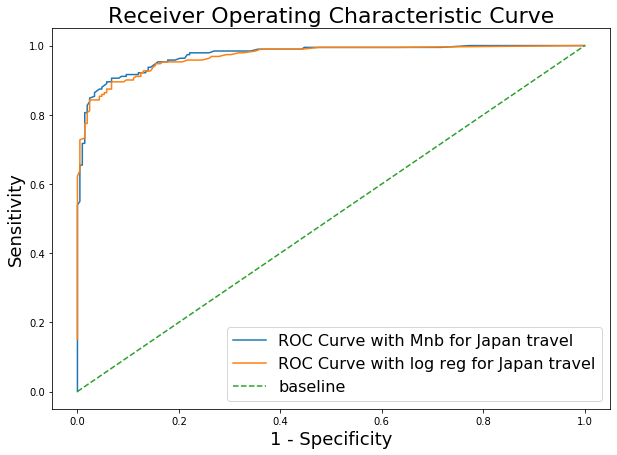

In [37]:
# Create figure.
plt.figure(figsize = (10,7))

# Create threshold values. (Dashed red line in image.)
thresholds = np.linspace(0, 1, 200)

# Define function to calculate sensitivity. (True positive rate.)
def TPR(df, true_col, pred_prob_col, threshold):
    true_positive = df[(df[true_col] == 0) & (df[pred_prob_col] >= threshold)].shape[0]
    false_negative = df[(df[true_col] == 0) & (df[pred_prob_col] < threshold)].shape[0]
    return true_positive / (true_positive + false_negative)
    

# Define function to calculate 1 - specificity. (False positive rate.)
def FPR(df, true_col, pred_prob_col, threshold):
    true_negative = df[(df[true_col] == 1) & (df[pred_prob_col] <= threshold)].shape[0]
    false_positive = df[(df[true_col] == 1) & (df[pred_prob_col] > threshold)].shape[0]
    return 1 - (true_negative / (true_negative + false_positive))
    
# Calculate sensitivity & 1-specificity for each threshold between 0 and 1.
tpr_values_mnb = [TPR(pred_df_mnb, 'true_values', 'pred_probs_japantravel', prob) for prob in thresholds]
fpr_values_mnb = [FPR(pred_df_mnb, 'true_values', 'pred_probs_japantravel', prob) for prob in thresholds]
tpr_values_log_reg = [TPR(pred_df_log_reg, 'true_values', 'pred_probs_japantravel', prob) for prob in thresholds]
fpr_values_log_reg = [FPR(pred_df_log_reg, 'true_values', 'pred_probs_japantravel', prob) for prob in thresholds]

# Plot ROC curve.
plt.plot(fpr_values_mnb, # False Positive Rate on X-axis
         tpr_values_mnb, # True Positive Rate on Y-axis
         label='ROC Curve with Mnb for Japan travel')
plt.plot(fpr_values_log_reg, # False Positive Rate on X-axis
         tpr_values_log_reg, # True Positive Rate on Y-axis
         label='ROC Curve with log reg for Japan travel')

# Plot baseline. (Perfect overlap between the two populations.)
plt.plot(np.linspace(0, 1, 200),
         np.linspace(0, 1, 200),
         label='baseline',
         linestyle='--')

# Label axes.
plt.title('Receiver Operating Characteristic Curve', fontsize=22)
plt.ylabel('Sensitivity', fontsize=18)
plt.xlabel('1 - Specificity', fontsize=18)

# Create legend.
plt.legend(fontsize=16);
plt.savefig('../image/JapantravelROC')

##### From the above ROC curve for Japan travel posts, We could infer that Multinomial NB perform slightly better than the Logistics regression same as for Japan life posts.

### Conclusion and Recommendation:

To classify the posts from japan travel and japan life subreddit, We have used 2 models. One is Logistics regression and the other is Multinomial neigh bayes. Accuracy calculated from test data for both the model are quite similar and it is just more than 90%. But still I choose Multinomial neigh bayes to be the better model as the accuracy on test data is even higher than on the training data. While, the accuracy on test data is 9 percent lower than on the training data. This shows the logistic regression model overfits on the training data.

The Multinomial neigh bayes model has accuracy of 91.72%. Japan life and Japan travel have some top common words like Japan, Tokyo etc. The model maynot work well on the common topwords between both subreddit. 

Also to avoid posting under a wrong subreddit and to get customer satisfaction reddit could create a category countries and put the political, life based posting there and use the travel category for travel related subreddit.
